# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# to display html file in kernel
from IPython.display import HTML

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 580


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"      # YOUR CODE HERE

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city                                      # YOUR CODE HERE
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()                   # YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat =      city_weather["coord"]["lat"]                   # YOUR CODE HERE
        city_lng =      city_weather["coord"]["lon"]                   # YOUR CODE HERE
        city_max_temp = city_weather["main"]["temp_max"]               # YOUR CODE HERE
        city_humidity = city_weather["main"]["humidity"]               # YOUR CODE HERE
        city_clouds =   city_weather["clouds"]["all"]                  # YOUR CODE HERE
        city_wind =     city_weather["wind"]["speed"]                  # YOUR CODE HERE
        city_country =  city_weather["sys"]["country"]                 # YOUR CODE HERE
        city_date =     city_weather["dt"]                             # YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chivhu
Processing Record 2 of Set 1 | margaret river
Processing Record 3 of Set 1 | edinburgh of the seven seas
Processing Record 4 of Set 1 | chernyshevskiy
Processing Record 5 of Set 1 | howrah
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | thompson
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | port mathurin
Processing Record 11 of Set 1 | amga
Processing Record 12 of Set 1 | nuuk
Processing Record 13 of Set 1 | kavaratti
Processing Record 14 of Set 1 | bilibino
Processing Record 15 of Set 1 | papatowai
Processing Record 16 of Set 1 | hermanus
Processing Record 17 of Set 1 | kodinsk
Processing Record 18 of Set 1 | az zuwaytinah
Processing Record 19 of Set 1 | tiksi
Processing Record 20 of Set 1 | waitangi
Processing Record 21 of Set 1 | voi
Processing Record 22 of Set 1 | sarangani
Processing

Processing Record 42 of Set 4 | ndende
Processing Record 43 of Set 4 | lijiang
Processing Record 44 of Set 4 | yarmouth
Processing Record 45 of Set 4 | jiagedaqi
Processing Record 46 of Set 4 | kataragama
City not found. Skipping...
Processing Record 47 of Set 4 | nantucket
Processing Record 48 of Set 4 | wangaratta
Processing Record 49 of Set 4 | san julian
Processing Record 0 of Set 5 | nekrasovskoye
Processing Record 1 of Set 5 | south hedland
Processing Record 2 of Set 5 | dalnegorsk
Processing Record 3 of Set 5 | mont-dore
Processing Record 4 of Set 5 | conduaga
Processing Record 5 of Set 5 | brisas de zicatela
Processing Record 6 of Set 5 | natal
Processing Record 7 of Set 5 | las palmas
Processing Record 8 of Set 5 | kapuskasing
Processing Record 9 of Set 5 | ahau
City not found. Skipping...
Processing Record 10 of Set 5 | xilin hot
Processing Record 11 of Set 5 | zhanaozen
Processing Record 12 of Set 5 | polyarnyy
Processing Record 13 of Set 5 | turaif
Processing Record 14 of S

Processing Record 34 of Set 8 | port-vila
Processing Record 35 of Set 8 | mhangura
Processing Record 36 of Set 8 | happy valley-goose bay
Processing Record 37 of Set 8 | saynshand
Processing Record 38 of Set 8 | tolanaro
Processing Record 39 of Set 8 | portland
Processing Record 40 of Set 8 | arraial do cabo
Processing Record 41 of Set 8 | kuta
Processing Record 42 of Set 8 | luena
Processing Record 43 of Set 8 | sittwe
Processing Record 44 of Set 8 | nar'yan-mar
Processing Record 45 of Set 8 | vingt cinq
City not found. Skipping...
Processing Record 46 of Set 8 | salalah
Processing Record 47 of Set 8 | gisborne
Processing Record 48 of Set 8 | quibala
Processing Record 49 of Set 8 | bandarbeyla
Processing Record 0 of Set 9 | adrar
Processing Record 1 of Set 9 | launceston
Processing Record 2 of Set 9 | shushtar
Processing Record 3 of Set 9 | nueva esperanza
Processing Record 4 of Set 9 | tobi village
City not found. Skipping...
Processing Record 5 of Set 9 | kafanchan
Processing Record

Processing Record 25 of Set 12 | santa elena de uairen
Processing Record 26 of Set 12 | enshi
Processing Record 27 of Set 12 | statesville
Processing Record 28 of Set 12 | saudarkrokur
Processing Record 29 of Set 12 | chiredzi
-----------------------------
Data Retrieval Complete      
-----------------------------


In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)                                      # YOUR CODE HERE

# Show Record Count
city_data_df.count()

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,chivhu,-19.0211,30.8922,59.32,40,0,11.70,ZW,1689869075
1,margaret river,-33.9500,115.0667,58.44,74,65,19.15,AU,1689869075
2,edinburgh of the seven seas,-37.0676,-12.3116,53.29,64,34,24.90,SH,1689869075
3,chernyshevskiy,63.0128,112.4714,58.23,77,53,3.62,RU,1689869075
4,howrah,22.5892,88.3103,86.00,79,40,9.22,IN,1689869076


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chivhu,-19.0211,30.8922,59.32,40,0,11.70,ZW,1689869075
1,margaret river,-33.9500,115.0667,58.44,74,65,19.15,AU,1689869075
2,edinburgh of the seven seas,-37.0676,-12.3116,53.29,64,34,24.90,SH,1689869075
3,chernyshevskiy,63.0128,112.4714,58.23,77,53,3.62,RU,1689869075
4,howrah,22.5892,88.3103,86.00,79,40,9.22,IN,1689869076


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

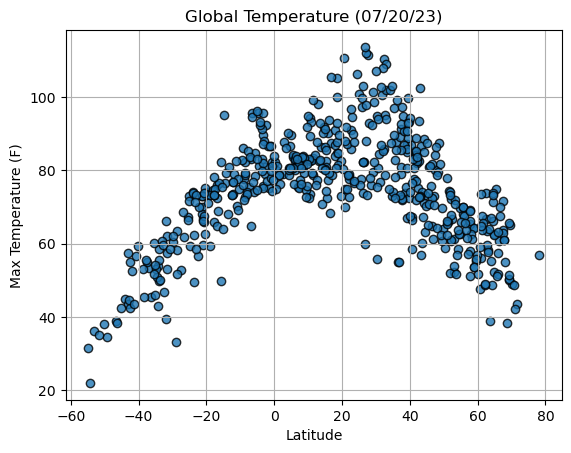

In [14]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

# Extract relevant fields from the data frame
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]

plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidth=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("Global Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/global/Temperature.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

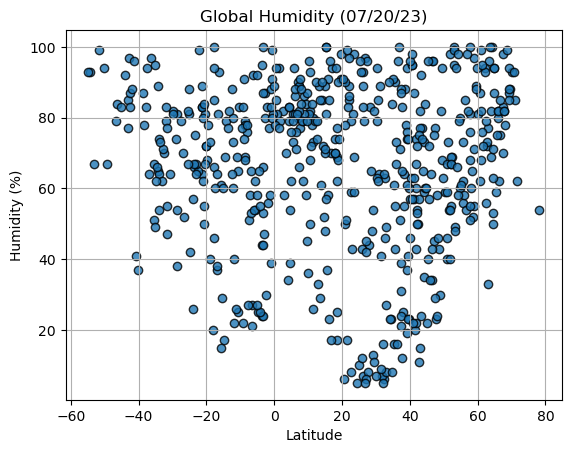

In [15]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

# Extract relevant fields from the data frame
lats = city_data_df["Lat"]
humidity = city_data_df["Humidity"]

plt.scatter(lats,
            humidity,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("Global Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/global/Humidity.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

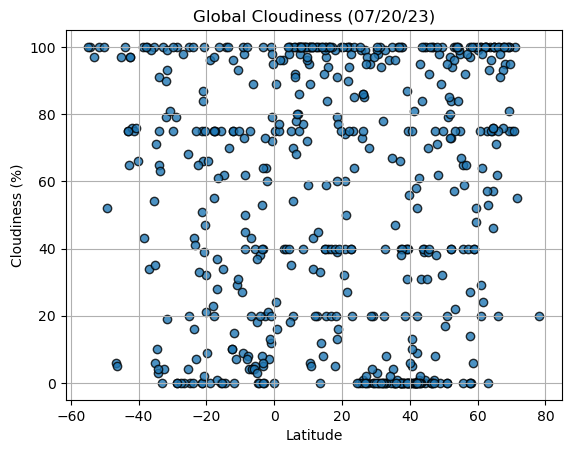

In [16]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

# Extract relevant fields from the data frame
lats = city_data_df["Lat"]
cloudiness = city_data_df["Cloudiness"]


plt.scatter(lats,
            cloudiness,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")


# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("Global Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/global/Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

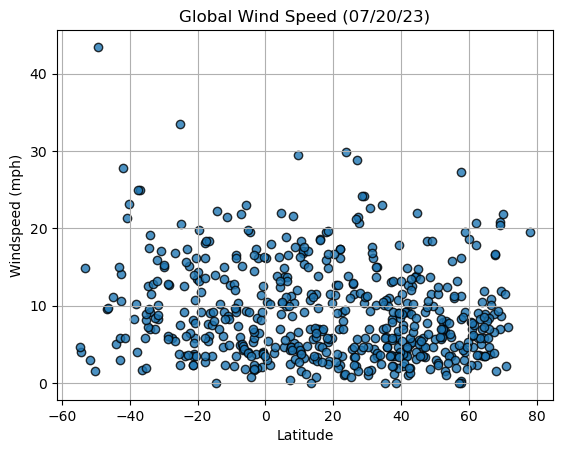

In [17]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Extract relevant fields from the data frame
lats = city_data_df["Lat"]
wind_speed = city_data_df["Wind Speed"]


plt.scatter(lats,
            wind_speed,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("Global Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Windspeed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/global/Wind Speed.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [18]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,chernyshevskiy,63.0128,112.4714,58.23,77,53,3.62,RU,1689869075
4,howrah,22.5892,88.3103,86.00,79,40,9.22,IN,1689869076
6,thompson,55.7435,-97.8558,68.16,73,40,4.61,CA,1689868951
10,amga,60.8953,131.9608,55.98,99,100,6.02,RU,1689869077
11,nuuk,64.1835,-51.7216,48.81,100,75,3.44,GL,1689869077


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chivhu,-19.0211,30.8922,59.32,40,0,11.70,ZW,1689869075
1,margaret river,-33.9500,115.0667,58.44,74,65,19.15,AU,1689869075
2,edinburgh of the seven seas,-37.0676,-12.3116,53.29,64,34,24.90,SH,1689869075
5,port-aux-francais,-49.3500,70.2167,34.47,67,52,43.46,TF,1689868843
7,punta arenas,-53.1500,-70.9167,36.10,67,97,14.81,CL,1689868785


###  Temperature vs. Latitude Linear Regression Plot

r value is: -0.6074417995458946


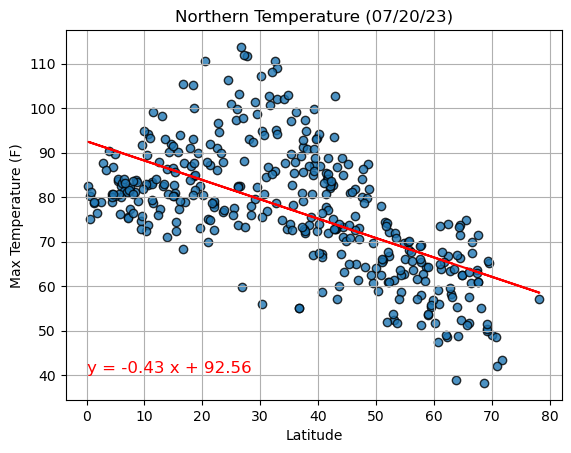

In [21]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

# Extract relevant fields from the data frame
lats = northern_hemi_df["Lat"]
max_temps = northern_hemi_df["Max Temp"]

# scatter
plt.scatter(lats, max_temps, edgecolor="black", linewidth=1, marker="o", alpha=0.8, )

# regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(lats, max_temps)
regress_values = lats*slope + intercept

#line plot
x_values=lats
y_values=regress_values
plt.plot(x_values, regress_values, color='red')

# Linear equation text on graph
linear_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.annotate(linear_eq, (0,40.5), fontsize=12, rotation=0, color='red') 

# other graph properties
plt.title("Northern Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/northern/Temperature.png")

# display rValue
print(f"r value is: {rvalue}")

# display graph
plt.show()

r value is: 0.8866907631928849


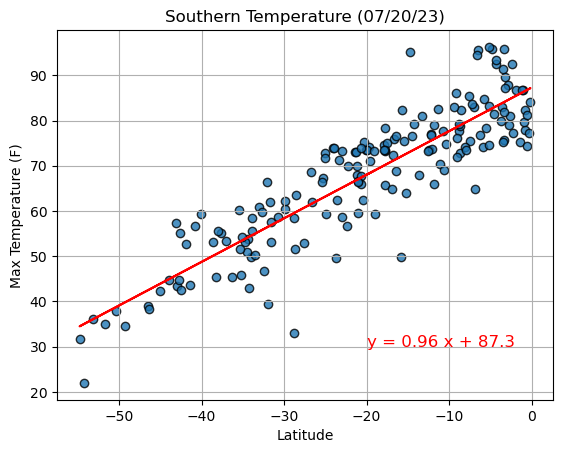

In [22]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

# Extract relevant fields from the data frame
lats = southern_hemi_df["Lat"]
max_temps = southern_hemi_df["Max Temp"]

# scatter
plt.scatter(lats, max_temps, edgecolor="black", linewidth=1, marker="o", alpha=0.8, )

# regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(lats, max_temps)
regress_values = lats*slope + intercept

#line plot
x_values=lats
y_values=regress_values
plt.plot(x_values, regress_values, color='red')

# Linear equation text on graph
linear_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.annotate(linear_eq, (-20,30), fontsize=12, rotation=0, color='red') 

# other graph properties
plt.title("Southern Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/southern/Temperature.png")

# display rValue
print(f"r value is: {rvalue}")

# display graph
plt.show()

**Discussion about the linear relationship:** From both graph, we can say clearly, closer to lat0(equador) means higher the temperature.
Main difference between graphs is the slope, that means temperature increase per latitude is more in southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

r value is: 0.025294451571163848


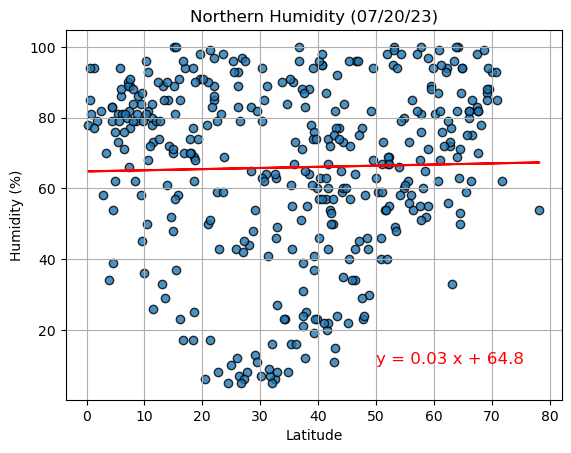

In [23]:
# Northern Hemisphere
# YOUR CODE HERE
# Extract relevant fields from the data frame
lats = northern_hemi_df["Lat"]
humids = northern_hemi_df["Humidity"]

# scatter
plt.scatter(lats, humids, edgecolor="black", linewidth=1, marker="o", alpha=0.8, )

# regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(lats, humids)
regress_values = lats*slope + intercept

#line plot
x_values=lats
y_values=regress_values
plt.plot(x_values, regress_values, color='red')

# Linear equation text on graph
linear_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.annotate(linear_eq, (50,10.5), fontsize=12, rotation=0, color='red') 

# other graph properties
plt.title("Northern Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/northern/Humidity.png")

# display rValue
print(f"r value is: {rvalue}")

# display graph
plt.show()

r value is: -0.26867720701377845


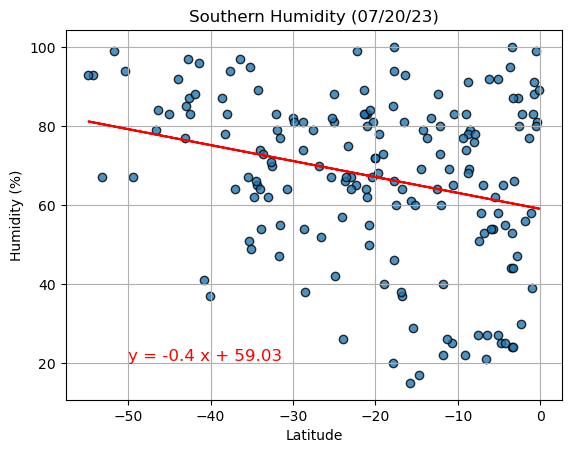

In [24]:
# Southern Hemisphere
# YOUR CODE HERE
# Extract relevant fields from the data frame
lats = southern_hemi_df["Lat"]
humids = southern_hemi_df["Humidity"]

# scatter
plt.scatter(lats, humids, edgecolor="black", linewidth=1, marker="o", alpha=0.8, )

# regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(lats, humids)
regress_values = lats*slope + intercept

#line plot
x_values=lats
y_values=regress_values
plt.plot(x_values, regress_values, color='red')

# Linear equation text on graph
linear_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.annotate(linear_eq, (-50,20.5), fontsize=12, rotation=0, color='red') 

# other graph properties
plt.title("Southern Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/southern/Humidity.png")

# display rValue
print(f"r value is: {rvalue}")

# display graph
plt.show()

**Discussion about the linear relationship:** From both graph, we can say clearly, closer to lat0(equador) means lower the humidity. Main difference between graphs is the slope, that means humidity decrease per latitude is more in northern hemisphere.
In other words, when we are getting closer to Lat0, weather is faster drying in southern hemisphere than northern.

### Cloudiness vs. Latitude Linear Regression Plot

r value is: -0.034676367813058294


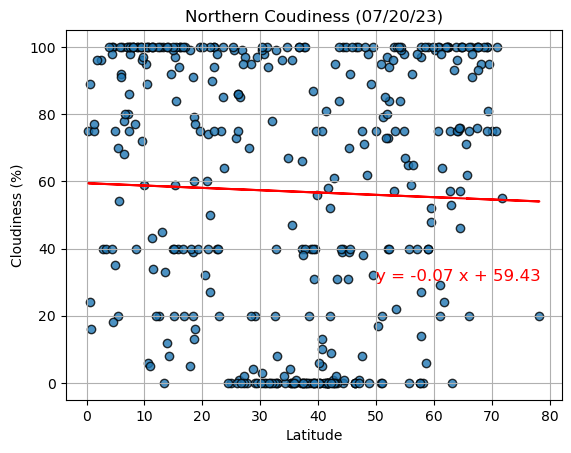

In [25]:
# Northern Hemisphere
# YOUR CODE HERE
# Extract relevant fields from the data frame
lats = northern_hemi_df["Lat"]
clouds = northern_hemi_df["Cloudiness"]

# scatter
plt.scatter(lats, clouds, edgecolor="black", linewidth=1, marker="o", alpha=0.8, )

# regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(lats, clouds)
regress_values = lats*slope + intercept

#line plot
x_values=lats
y_values=regress_values
plt.plot(x_values, regress_values, color='red')

# Linear equation text on graph
linear_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.annotate(linear_eq, (50,30.5), fontsize=12, rotation=0, color='red') 

# other graph properties
plt.title("Northern Coudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/northern/Cloudiness.png")

# display rValue
print(f"r value is: {rvalue}")

# display graph
plt.show()

r value is: -0.30567120450037333


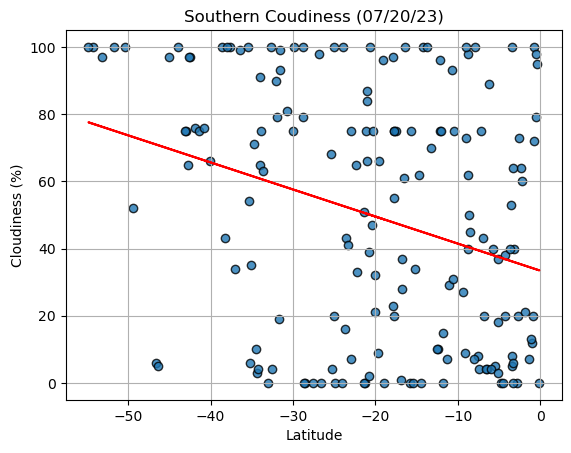

In [26]:
# Southern Hemisphere
# YOUR CODE HERE
# Extract relevant fields from the data frame
lats = southern_hemi_df["Lat"]
clouds = southern_hemi_df["Cloudiness"]

# scatter
plt.scatter(lats, clouds, edgecolor="black", linewidth=1, marker="o", alpha=0.8, )

# regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(lats, clouds)
regress_values = lats*slope + intercept

#line plot
x_values=lats
y_values=regress_values
plt.plot(x_values, regress_values, color='red')

# Linear equation text on graph
linear_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.annotate(linear_eq, (50,30.5), fontsize=12, rotation=0, color='red') 

# other graph properties
plt.title("Southern Coudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/southern/Cloudiness.png")

# display rValue
print(f"r value is: {rvalue}")

# display graph
plt.show()

**Discussion about the linear relationship:** From both graph, we can say clearly, closer to lat0(equador) means clearer the sky. Main difference between graphs is the slope, that means clear sky per latitude is more in southern hemisphere.
In other words, when we are getting closer to Lat0, weather is faster clearing sky in southern hemisphere than northern.

### Wind Speed vs. Latitude Linear Regression Plot

r value is: -0.10149871794960548


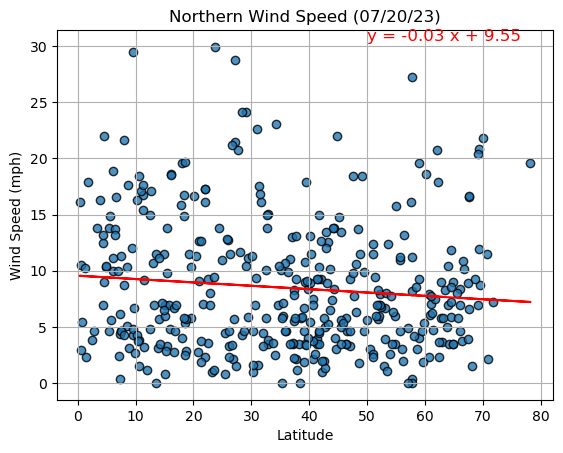

In [27]:
# Northern Hemisphere
# YOUR CODE HERE
# Extract relevant fields from the data frame
lats = northern_hemi_df["Lat"]
winds = northern_hemi_df["Wind Speed"]

# scatter
plt.scatter(lats, winds, edgecolor="black", linewidth=1, marker="o", alpha=0.8, )

# regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(lats, winds)
regress_values = lats*slope + intercept

#line plot
x_values=lats
y_values=regress_values
plt.plot(x_values, regress_values, color='red')

# Linear equation text on graph
linear_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.annotate(linear_eq, (50,30.5), fontsize=12, rotation=0, color='red') 

# other graph properties
plt.title("Northern Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/northern/Wind Speed.png")

# display rValue
print(f"r value is: {rvalue}")

# display graph
plt.show()

r value is: -0.1699430646666259


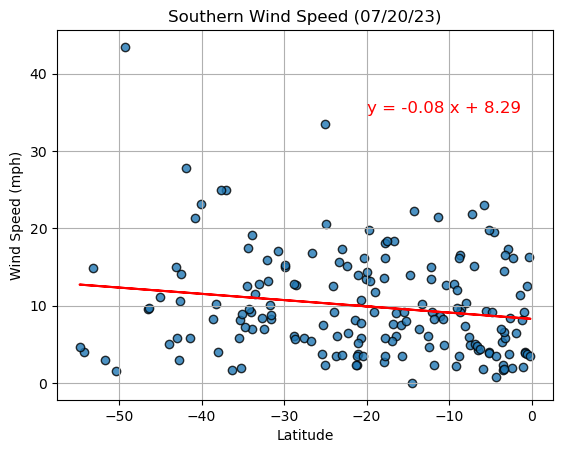

In [28]:
# Southern Hemisphere
# YOUR CODE HERE
# Extract relevant fields from the data frame
lats = southern_hemi_df["Lat"]
winds = southern_hemi_df["Wind Speed"]

# scatter
plt.scatter(lats, winds, edgecolor="black", linewidth=1, marker="o", alpha=0.8, )

# regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(lats, winds)
regress_values = lats*slope + intercept

#line plot
x_values=lats
y_values=regress_values
plt.plot(x_values, regress_values, color='red')

# Linear equation text on graph
linear_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.annotate(linear_eq, (-20,35), fontsize=12, rotation=0, color='red') 

# other graph properties
plt.title("Southern Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/southern/Wind Speed.png")

# display rValue
print(f"r value is: {rvalue}")

# display graph
plt.show()

**Discussion about the linear relationship:** From both graph, we can say clearly, closer to lat0(equador) wind speed is reducing. Speed reducing is almost equal in both hemisphares. Slopes are almost equal in both graph.

### Bonus

### Show All Graphs on a single page

In [29]:
# We have created total of 12 graphs, i think, to see them on a sigle page would help more to visualize overall.
# I decided to put them on a single html page
# html is basically a text file, only extension is ".html" instead of ".txt"

In [37]:
contents = '<!DOCTYPE html>'
contents += '<html>'

contents += '<h3>Global Weather Analysis</h3>'
contents += '<table style="border-collapse:collapse">'

contents += '<tr style="background:#ccf">'
contents += '<td>Global <br>Weather <br>Variables <br><br>Among <br>~500 Cities</td>'
contents += '<td><img src="global/Temperature.png" width="100%"  /></td>'
contents += '<td><img src="global/Humidity.png"    width="100%"  /></td>'
contents += '<td><img src="global/Cloudiness.png"  width="100%"  /></td>'
contents += '<td><img src="global/Wind Speed.png"  width="100%"  /></td>'
contents += '</tr>'

contents += '<tr>'
contents += '<td>Northern <br>Hemisphere</td>'
contents += '<td><img src="northern/Temperature.png" width="100%"  /></td>'
contents += '<td><img src="northern/Humidity.png"    width="100%"  /></td>'
contents += '<td><img src="northern/Cloudiness.png"  width="100%"  /></td>'
contents += '<td><img src="northern/Wind Speed.png"  width="100%"  /></td>'
contents += '</tr>'

contents += '<td>Southern <br>Hemisphere</td>'
contents += '<td><img src="southern/Temperature.png" width="100%"  /></td>'
contents += '<td><img src="southern/Humidity.png"    width="100%"  /></td>'
contents += '<td><img src="southern/Cloudiness.png"  width="100%"  /></td>'
contents += '<td><img src="southern/Wind Speed.png"  width="100%"  /></td>'
contents += '</tr>'

contents += '<td height="100px">Conclusions</td>'
contents += '<td align="center">Getting closer to latitude 0, <br>Temperature is increasing in both hemisphere,<br> but southern, increasing is faster.</td>'
contents += '<td align="center">Getting closer to latitude 0, <br>Humidity is almost stable north hemisphere,<br> but southern, increasing significantly.</td>'
contents += '<td align="center">Getting closer to latitude 0, <br>Cloudines is decreasing in both hemisphere,<br> but southern, decreasing is faster.</td>'
contents += '<td align="center">Getting closer to latitude 0, <br>Wind speed is slightly decreasing in both hemisphere,<br> but not significant, negligible.</td>'
contents += '</tr>'

contents += '</table>'

contents += '<p>Hikmet Yigit <br> Toronto, Jul 20, 2023'
contents += '</html>'

# open and close re-writable file means clearing the existing file
# in other words, open the file and print "none" in it.
open('output_data/Global Weather Analysis.html', 'w').close()

# then writing contents in the lines of file
f = open("output_data/Global Weather Analysis.html", "a")
f.write(contents)
f.close()

In [38]:
#open and read the file after the appending:
f = open("output_data/Global Weather Analysis.html", "r")
print(f.read()) # just to make sure file is written as I wish

<!DOCTYPE html><html><h3>Global Weather Analysis</h3><table style="border-collapse:collapse"><tr style="background:#ccf"><td>Global <br>Weather <br>Variables <br><br>Among <br>~500 Cities</td><td><img src="global/Temperature.png" width="100%"  /></td><td><img src="global/Humidity.png"    width="100%"  /></td><td><img src="global/Cloudiness.png"  width="100%"  /></td><td><img src="global/Wind Speed.png"  width="100%"  /></td></tr><tr><td>Northern <br>Hemisphere</td><td><img src="northern/Temperature.png" width="100%"  /></td><td><img src="northern/Humidity.png"    width="100%"  /></td><td><img src="northern/Cloudiness.png"  width="100%"  /></td><td><img src="northern/Wind Speed.png"  width="100%"  /></td></tr><td>Southern <br>Hemisphere</td><td><img src="southern/Temperature.png" width="100%"  /></td><td><img src="southern/Humidity.png"    width="100%"  /></td><td><img src="southern/Cloudiness.png"  width="100%"  /></td><td><img src="southern/Wind Speed.png"  width="100%"  /></td></tr><

### Wiev html page on web-browser

In [39]:
# Please open the file "output_data/Global Weather Analysis.html" in your file explorer to see on your web-browser.
# Web-browser is rendering the text file we just created.